<a href="https://colab.research.google.com/github/sjunc/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09주차 수업

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 결측값 제거

In [3]:
df = pd.DataFrame({'sex': ['M', 'F', np.nan, 'M', 'F'],
                   'score': [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [4]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [6]:
df.dropna(axis=1)

""
0
1
2
3
4


In [9]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [10]:
df.dropna(subset = ['score']) # score 열에서 null이 있을 때 행 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [11]:
df.dropna(subset = ['score'], axis = 0) # score 열에서 null이 있을 때 행 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [13]:
df.dropna(subset = ['score'], axis = 1) # 오류

KeyError: ['score']

In [14]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [15]:
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [16]:
df_nomiss = df.dropna(subset = 'score') # [] 여러 일 때 리스트로 하나일 땐 같음
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [17]:
df_nomiss = df.dropna(subset = ['sex','score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [18]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [19]:
df.score.mean()

np.float64(4.0)

In [20]:
df['score'].sum()

np.float64(16.0)

In [21]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [31]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, pd.Timestamp("1940-04-25"), pd.NaT]}) # timestamp null 값 NaT Not availabel Time
df


,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [32]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [33]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [34]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [35]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [36]:
df.dropna(axis='index') # axis = 0

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [38]:
df.dropna(how = 'any') # 기본 값 any

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [39]:
df.dropna(how = 'all') # 모든 값 nan 일 때 제거 (아무도 제거 안 된걸 확인 가능)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [41]:
df.dropna(thresh =2) # 정상값이 2개 이상인 값 잔류

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [43]:
df.dropna(thresh =1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [44]:
df.dropna(thresh = 3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [45]:
df.dropna(thresh = 2, axis = 1)

,name,toy
0,Alfred,NaN
1,Batman,Batmobile
2,Catwoman,Bullwhip


In [46]:
df.dropna(subset = ['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [47]:
df.dropna(subset = 'toy')

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [48]:
df.dropna(subset = ['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


## 빈 데이터프레임 확인 방법 df.empty

In [49]:
df1 = pd.DataFrame(index = ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [50]:
df1.empty # 함수가 아님 속성 ,  () 없이

True

In [51]:
df2 = pd.DataFrame(columns = ['col1', 'col2', 'col3'])
df2

,col1,col2,col3


In [52]:
df2.empty

True

In [53]:
df3 = pd.DataFrame(index = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [55]:
df3.empty   # nan 값은 빈 값이 아님

False

In [58]:
df4 = pd.DataFrame(np.nan,
                   index = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df4

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [57]:
df4.empty

False

In [59]:
df5 = pd.DataFrame(2,                                       # 하나 넣으면 그 데이터로 전부 들어감
                   index = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df5

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [60]:
df5.empty

False

## 결측값 대체

In [61]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 4.85 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [84]:
exam = pd.read_csv('data/exam.csv')      # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당 순서가 맞아야함. [행], [열]
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [75]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


## 결측값 채워넣기 fillna()

In [81]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [85]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [87]:
pd.set_option('display.precision', 2) # 소숫점 2번째 까지만
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [ ]:
exam['math']

In [88]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [89]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [90]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [91]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [92]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [94]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [95]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [96]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [97]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [99]:
df['score'] = np.where(df['score']  > 5, np.nan, df['score']) # 만점이 5점이라 할때 5점 초과는 nan 값
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [100]:
df.groupby('sex').agg(mean_mean = ('score', 'mean'))

,mean_mean
sex,
1.0,4.0
2.0,3.0


In [101]:
df.dropna(subset = ['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [103]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_mean = ('score', 'mean')) # 기본 groupby와 결과가 다르지 않음

,mean_mean
sex,
1.0,4.0
2.0,3.0


In [106]:
df = pd.DataFrame([1])
df

,0
0,1


In [107]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [108]:
df = pd.DataFrame([[1, 1, 2, 2]])
df                                  # [] 추가 2차원으로 행으로 들어감

,0,1,2,3
0,1,1,2,2


In [111]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [112]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [114]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None) # 'a' 는 문자열 같은 데이터 타입 열에 들어가야 하므로 np.nan 불가 None 문자값이라서 가능
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [115]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [117]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [119]:
df['x2'] = df['x2'].replace('etc',np.nan)   # 대체 사용시 가능
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [120]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [121]:
df = df.fillna(10)

In [122]:
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [124]:
df.info() # 전체 타입은 문자열 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [125]:
type(df.loc[2, 'x2']) # 섞인 걸로 나옴

int

In [126]:
type(df.loc[0, 'x2'])

str

## 이상값(outlier) 알아보기

In [127]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
79,ford,explorer 4wd,4.0,1999,6,auto(l5),4,14,17,r,suv
88,ford,f150 pickup 4wd,5.4,1999,8,auto(l4),4,11,15,r,pickup
71,dodge,ram 1500 pickup 4wd,5.2,1999,8,manual(m5),4,11,16,r,pickup
66,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,13,17,r,pickup
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
159,subaru,forester awd,2.5,1999,4,manual(m5),4,18,25,r,suv
68,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,12,16,r,pickup
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv


In [128]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [130]:
%config InlineBackend.figure_format = 'retina'

In [132]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


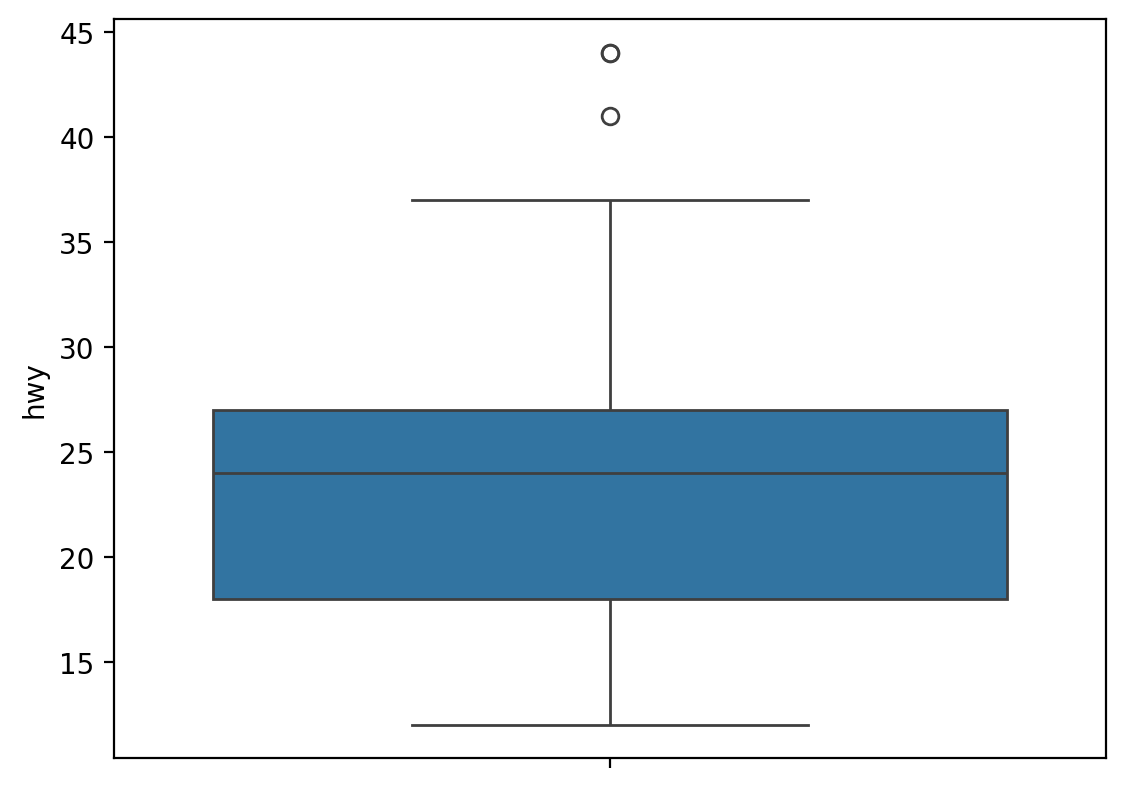

In [131]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

Interquarile Range (IQR)   
25% ~ 75%   
기말고사 시험 문제  
  
IQR = 75% - 25%  
수염 끝 정상 범위의 가장 큰 값, 가장 작은 값  
IQR의 1.5배   

이를 벗어나는 이상치 outlier  

In [148]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [135]:
s.quantile()      # 중앙값

np.float64(3.0)

In [137]:
s.quantile([.1, .25, .5, .75])      # % 값 확인 (좀 다를 수 있음 중앙값 중요)

,0
0.10,1.4
0.25,2.0
0.50,3.0
0.75,4.0


In [138]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [139]:
mpg['hwy'].quantile([.25, .5, .75])

,hwy
0.25,18.0
0.50,24.0
0.75,27.0


In [140]:
a, b = [10, 20]

In [141]:
a

10

In [142]:
b

20

In [143]:
p25, p50, p75 = mpg['hwy'].quantile([.25, .5, .75])

In [144]:
p25

18.0

In [146]:
p50

24.0

In [147]:
p75    ## IQR = 9

27.0

In [149]:
iqr = p75 - p25
iqr

9.0

In [153]:
## upper fence
upfence = p75 + iqr*1.5
upfence

40.5

In [154]:
## lower fence
lowfence = p25 - iqr*1.5
lowfence

4.5

In [155]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [158]:
mpg.hwy.describe()['25%']   # series 참조 방식

np.float64(18.0)

In [159]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [160]:
mpg[mpg.hwy > upfence] # 위쪽 이상치 탐지

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [165]:
mpg[mpg.hwy < lowfence] # 아래 이상치는 존재하지 않음

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [166]:
mpg[mpg.hwy > upfence]['hwy']   # hwy 만 확인

,hwy
212,44
221,44
222,41


In [167]:
mpg[mpg.hwy > upfence]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [169]:
mpg.info()    # 결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [170]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [172]:
mpg[(mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [173]:
mpg[(mpg['hwy'] < lowfence) | (mpg['hwy'] > upfence)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [174]:
mpg['hwy'] = np.where((mpg.hwy<lowfence)|(mpg.hwy>upfence), np.nan, mpg['hwy'])   # 이상치 nan 으로 변환
mpg.hwy.isna().sum()    # nan 값 확인

np.int64(3)

In [175]:
mpg[mpg['hwy'].isna()]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [176]:
len(mpg)

234

In [177]:
dmpg = mpg.dropna(subset = ['hwy'])
len(dmpg)

231

In [178]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [180]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))    # Nan 값으로 대체 했었을 땐 같음

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


"rear wheel" 후륜 r   
"front wheel" 전륜 f  
"4 wheel" 4륜 f   

In [181]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))    # 원본에서

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [182]:
mpg[ (mpg['hwy']< lowfence)| (mpg['hwy'] > upfence)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


## 7장 종료